## Exercício 1


![alt text](<exercicio 1.png>)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Constantes físicas
g = 9.8      # aceleração da gravidade (m/s^2)
k = 0.1      # coeficiente de resistência do ar (1/s)

# Condições iniciais
v0 = 0       # velocidade inicial (m/s)
x0 = 0       # posição inicial (m)
t_max = 10   # tempo total (s)
dt = 0.001   # passo de tempo (s)

#### Parte 2 — Método de Euler Simples (sem listas)


In [4]:
def euler_simples(dt, t_max):
    """Euler explícito simples, sem estruturas de dados extras."""
    t = 0
    v = v0
    x = x0
    N = int(t_max / dt)
    
    # Simulação (sem armazenar resultados)
    for _ in range(N):
        a = g - k * v
        v += a * dt
        x += v * dt
        t += dt
    
    return x, v  # Retorna apenas o último valor

####  Parte 3 — Euler com listas e append()

In [5]:
def euler_append(dt, t_max):
    """Euler com listas e uso de append (mais lento)."""
    N = int(t_max / dt)
    t = 0

    t_list = []
    x_list = []
    v_list = []

    v = v0
    x = x0

    for _ in range(N):
        a = g - k * v
        v += a * dt
        x += v * dt
        t += dt

        # Armazenando tudo
        t_list.append(t)
        x_list.append(x)
        v_list.append(v)
    
    return t_list, x_list, v_list

#### Parte 4 — Euler com pré-alocação (numpy)

In [6]:
def euler_numpy(dt, t_max):
    """Euler com arrays numpy (mais rápido)."""
    N = int(t_max / dt)
    t_array = np.zeros(N)
    x_array = np.zeros(N)
    v_array = np.zeros(N)

    x = x0
    v = v0

    for i in range(1, N):
        a = g - k * v
        v += a * dt
        x += v * dt

        t_array[i] = i * dt
        x_array[i] = x
        v_array[i] = v

    return t_array, x_array, v_array


#### ⏱️ Parte 5 — Comparação de Desempenho

In [10]:
def medir_tempo(func, dt, t_max):
    """Mede o tempo de execução de uma função."""
    inicio = time.time()
    func(dt, t_max)
    fim = time.time()
    return fim - inicio

# Testar com diferentes N
Ns = [10**3, 10**4, 10**5, 10**6]
tempos = {
    "Euler Simples": [],
    "Euler Append": [],
    "Euler Numpy": []
}

for N in Ns:
    tmax = N * dt
    tempos["Euler Simples"].append(medir_tempo(euler_simples, dt, tmax))
    tempos["Euler Append"].append(medir_tempo(euler_append, dt, tmax))
    tempos["Euler Numpy"].append(medir_tempo(euler_numpy, dt, tmax))

####  Parte 6 — Gráfico Comparativo (log-log)

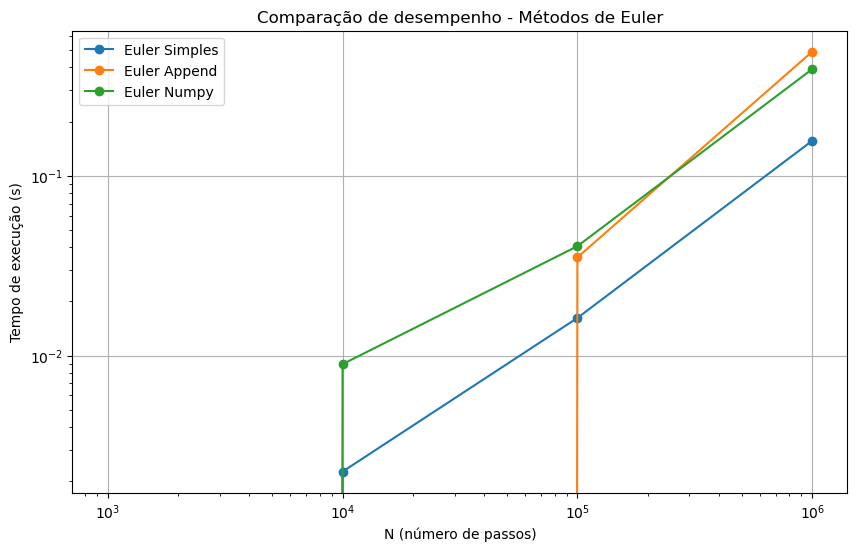

In [11]:
plt.figure(figsize=(10,6))

for metodo, t_exec in tempos.items():
    plt.plot(Ns, t_exec, label=metodo, marker='o')

plt.xscale('log')
plt.yscale('log')
plt.xlabel('N (número de passos)')
plt.ylabel('Tempo de execução (s)')
plt.title('Comparação de desempenho - Métodos de Euler')
plt.legend()
plt.grid(True)
plt.show()

#### Parte 7 — Runge-Kutta de 4ª Ordem (para comparação de precisão)



In [1]:
def runge_kutta_4(dt, t_max):
    """Método de Runge-Kutta 4ª ordem para o mesmo problema."""
    N = int(t_max / dt)
    t_array = np.zeros(N)
    x_array = np.zeros(N)
    v_array = np.zeros(N)

    x = x0
    v = v0

    for i in range(1, N):
        t = i * dt

        def a(v): return g - k * v

        # Runge-Kutta para v
        k1v = a(v)
        k1x = v

        k2v = a(v + 0.5 * dt * k1v)
        k2x = v + 0.5 * dt * k1v

        k3v = a(v + 0.5 * dt * k2v)
        k3x = v + 0.5 * dt * k2v

        k4v = a(v + dt * k3v)
        k4x = v + dt * k3v

        v += dt / 6 * (k1v + 2*k2v + 2*k3v + k4v)
        x += dt / 6 * (k1x + 2*k2x + 2*k3x + k4x)

        t_array[i] = t
        x_array[i] = x
        v_array[i] = v

    return t_array, x_array, v_array


#### gráfico comparando as trajetórias 𝑥(𝑡) x(t) dos métodos Euler e Runge-Kutta para ver a diferença na precisão.


In [2]:
# Gerar os dados com t_max fixo para todos os métodos
t_max = 10  # tempo total em segundos
dt = 0.001  # passo de tempo

# Usar as versões que armazenam os dados
t_append, x_append, _ = euler_append(dt, t_max)
t_numpy, x_numpy, _ = euler_numpy(dt, t_max)
t_rk4, x_rk4, _ = runge_kutta_4(dt, t_max)

plt.figure(figsize=(10, 6))
plt.plot(t_append, x_append, label="Euler com append", linestyle='--')
plt.plot(t_numpy, x_numpy, label="Euler com numpy", linestyle='-.')
plt.plot(t_rk4, x_rk4, label="Runge-Kutta 4ª ordem", linewidth=2)

plt.xlabel("Tempo (s)")
plt.ylabel("Posição (m)")
plt.title("Comparação das trajetórias x(t)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


NameError: name 'euler_append' is not defined

## Exercício 2

![alt text](<Exercicio 2.png>)

 ### Parte A — Precisão limitada com float vs decimal.Decimal

In [3]:
from decimal import Decimal, getcontext

# Expressão: S = (1 + 1e-16) - 1
# Usando float padrão
S_float = (1 + 1e-16) - 1
print("Usando float:", S_float)

# Usando Decimal com 50 dígitos de precisão
getcontext().prec = 50
S_decimal = (Decimal('1') + Decimal('1e-16')) - Decimal('1')
print("Usando Decimal:", S_decimal)


Usando float: 0.0
Usando Decimal: 1E-16


### Parte B — Diferença entre números próximos

In [4]:
def comparar_operacoes(a, b):
    """Mostra a diferença direta e média aritmética entre dois números"""
    diff = a - b
    media = (a + b) / 2
    return diff, media

# Teste com float
a1, b1 = 1.0000001, 1.0000000
diff1, media1 = comparar_operacoes(a1, b1)
print("Float - Diferença:", diff1, "Média:", media1)

# Usando Decimal
a2 = Decimal("1.0000001")
b2 = Decimal("1.0000000")
diff2, media2 = comparar_operacoes(a2, b2)
print("Decimal - Diferença:", diff2, "Média:", media2)

# Teste com números muito pequenos
a3, b3 = 1e-8, 0
diff3, media3 = comparar_operacoes(a3, b3)
print("Float (pequeno) - Diferença:", diff3, "Média:", media3)


Float - Diferença: 1.0000000005838672e-07 Média: 1.0000000500000001
Decimal - Diferença: 1E-7 Média: 1.00000005
Float (pequeno) - Diferença: 1e-08 Média: 5e-09


### Gráfico do erro relativo em (1+𝑥)−1(1+x)−1

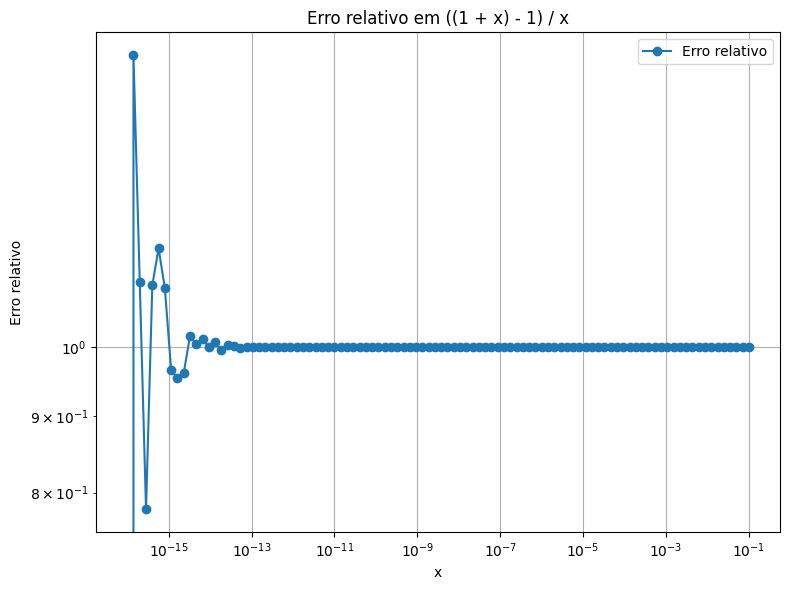

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Valores de x entre 1e-1 e 1e-16
x_vals = np.logspace(-1, -16, 100)
erro_relativo = ((1 + x_vals) - 1) / x_vals

plt.figure(figsize=(8,6))
plt.plot(x_vals, erro_relativo, marker='o', linestyle='-', label='Erro relativo')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('x')
plt.ylabel('Erro relativo')
plt.title('Erro relativo em ((1 + x) - 1) / x')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


### Parte D — Derivada Numérica com Diferença Finita

In [6]:
import math

def derivada_f(x, h):
    """Aproxima a derivada de ln(x) no ponto x usando diferença finita"""
    return (math.log(x + h) - math.log(x)) / h


#### Calcular erro para vários h:

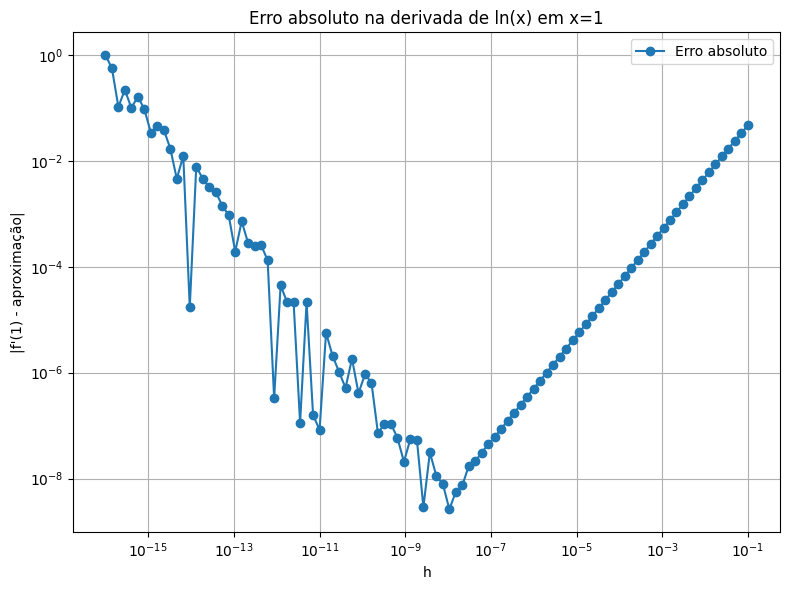

In [7]:
h_vals = np.logspace(-1, -16, 100)
erro_abs = [abs(derivada_f(1, h) - 1) for h in h_vals]

plt.figure(figsize=(8,6))
plt.plot(h_vals, erro_abs, marker='o', label='Erro absoluto')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h')
plt.ylabel('|f\'(1) - aproximação|')
plt.title('Erro absoluto na derivada de ln(x) em x=1')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


## Questão 3

![alt text](exercicio3.png)

### Parte A — Soma iterativa vs soma analítica

In [8]:
import time

def soma_iterativa(N):
    soma = 0
    for i in range(1, N+1):
        soma += i
    return soma

def soma_analitica(N):
    return N * (N + 1) // 2  # uso de // para forçar inteiro


In [9]:
### medir para diferentes N
Ns = [10**6, 10**7, 10**8]
tempos_iter = []
tempos_analitica = []

for N in Ns:
    start = time.time()
    soma_iterativa(N)
    end = time.time()
    tempos_iter.append(end - start)

    start = time.time()
    soma_analitica(N)
    end = time.time()
    tempos_analitica.append(end - start)


### Parte B — Soma com listas

In [10]:
def soma_com_for(lista):
    soma = 0
    for x in lista:
        soma += x
    return soma

def soma_com_sum(lista):
    return sum(lista)


In [11]:
# Medindo pra diferentes N

Ns_lista = [10**6, 10**7]
tempos_for = []
tempos_sum = []

for N in Ns_lista:
    lista = list(range(1, N+1))

    start = time.time()
    soma_com_for(lista)
    end = time.time()
    tempos_for.append(end - start)

    start = time.time()
    soma_com_sum(lista)
    end = time.time()
    tempos_sum.append(end - start)


### Parte C — Visualização com matplotlib

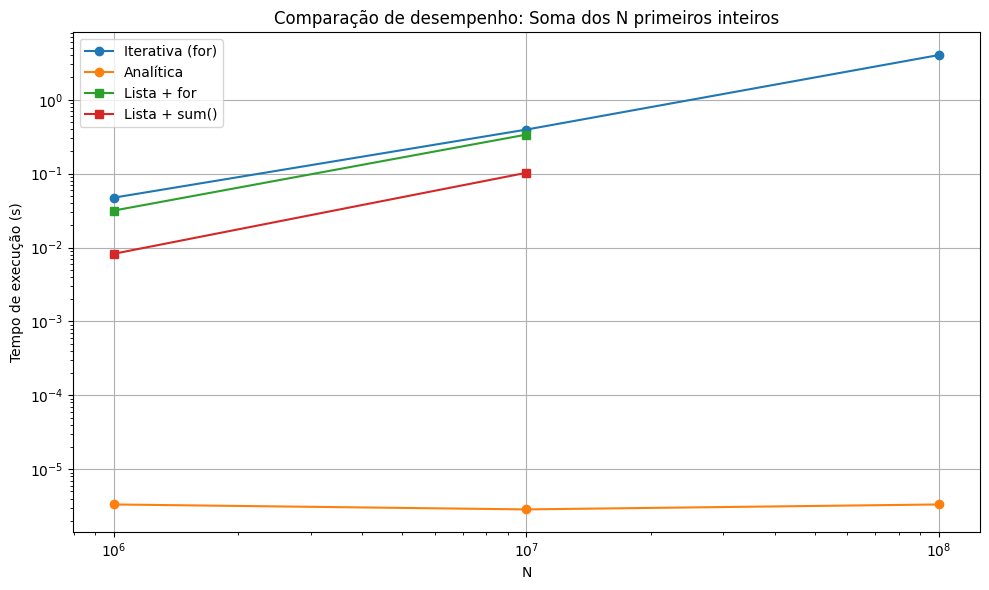

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(Ns, tempos_iter, label='Iterativa (for)', marker='o')
plt.plot(Ns, tempos_analitica, label='Analítica', marker='o')
plt.plot(Ns_lista, tempos_for, label='Lista + for', marker='s')
plt.plot(Ns_lista, tempos_sum, label='Lista + sum()', marker='s')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("N")
plt.ylabel("Tempo de execução (s)")
plt.title("Comparação de desempenho: Soma dos N primeiros inteiros")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Parte D — Versão vetorizada com NumPy

In [13]:
import numpy as np

def soma_numpy(N):
    arr = np.arange(1, N+1)
    return np.sum(arr)


In [14]:
# Medindo o tempo 

tempos_numpy = []

for N in Ns_lista:
    start = time.time()
    soma_numpy(N)
    end = time.time()
    tempos_numpy.append(end - start)

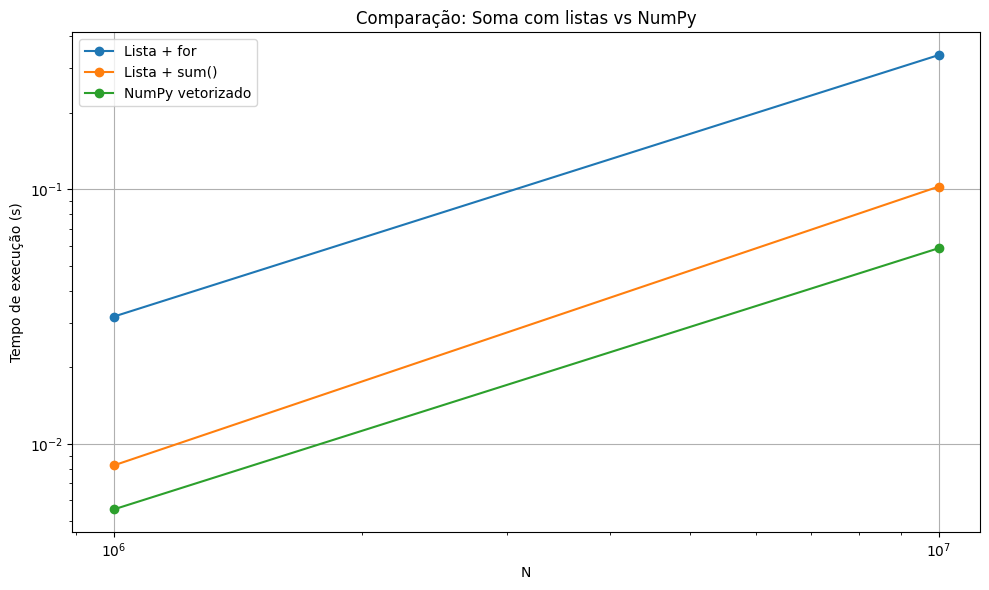

In [15]:
plt.figure(figsize=(10,6))
plt.plot(Ns_lista, tempos_for, label='Lista + for', marker='o')
plt.plot(Ns_lista, tempos_sum, label='Lista + sum()', marker='o')
plt.plot(Ns_lista, tempos_numpy, label='NumPy vetorizado', marker='o')

plt.xscale('log')
plt.yscale('log')
plt.xlabel("N")
plt.ylabel("Tempo de execução (s)")
plt.title("Comparação: Soma com listas vs NumPy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()